In [3]:
import pandas as pd
import numpy as np
import seaborn as sb

In [6]:
normtemp=pd.read_csv('Normtemp.csv')
normtemp

,Body Temp,Gender,Heart Rate
0,96.3,2,70
1,96.7,2,71
2,96.9,2,74
3,97.0,2,80
4,97.1,2,73
...,...,...,...
125,99.3,1,68
126,99.4,1,77
127,99.9,1,79
128,100.0,1,78


In [8]:
normtemp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Body Temp   130 non-null    float64
 1   Gender      130 non-null    int64  
 2   Heart Rate  130 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.2 KB


In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
normt= StandardScaler().fit_transform(normtemp)
normt

array([[-2.6688711 ,  1.        , -0.53469964],
       [-2.12119432,  1.        , -0.39255045],
       [-1.84735592,  1.        ,  0.03389711],
       [-1.71043673,  1.        ,  0.88679225],
       [-1.57351753,  1.        , -0.10825208],
       [-1.57351753,  1.        ,  0.1760463 ],
       [-1.57351753,  1.        ,  1.17109063],
       [-1.43659834,  1.        , -1.38759478],
       [-1.29967914,  1.        , -0.67684883],
       [-1.16275994,  1.        , -0.53469964],
       [-1.16275994,  1.        , -0.81899802],
       [-1.16275994,  1.        , -0.25040127],
       [-1.16275994,  1.        ,  0.60249387],
       [-1.02584075,  1.        , -0.53469964],
       [-1.02584075,  1.        ,  0.1760463 ],
       [-0.88892155,  1.        ,  0.03389711],
       [-0.88892155,  1.        , -0.67684883],
       [-0.88892155,  1.        , -0.10825208],
       [-0.75200235,  1.        ,  0.46034468],
       [-0.61508316,  1.        , -2.24048992],
       [-0.61508316,  1.        , -0.108

In [14]:
covariancematrix = np.cov(normt.T)
covariancematrix

array([[ 1.00775194, -0.19954115,  0.25562273],
       [-0.19954115,  1.00775194, -0.05619852],
       [ 0.25562273, -0.05619852,  1.00775194]])

In [15]:
correlationmatrix = np.corrcoef(normt.T)
correlationmatrix

array([[ 1.        , -0.19800622,  0.2536564 ],
       [-0.19800622,  1.        , -0.05576622],
       [ 0.2536564 , -0.05576622,  1.        ]])

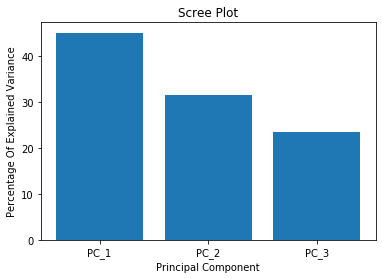

In [42]:
pca=PCA()
PCcomp=pca.fit(normt)
PCcomp=pca.transform(normt)
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
import matplotlib.pyplot as plt
labels=['PC_'+ str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage Of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

covariance  matrix of PC_1 and PC_2:
[[ 1.36068531e+00 -7.68389843e-17]
 [-7.68389843e-17  9.53336268e-01]]
correlation  matrix of PC_1 and PC_2:
[[ 1.0000000e+00 -6.7465184e-17]
 [-6.7465184e-17  1.0000000e+00]]


Text(0, 0.5, 'PC_2')

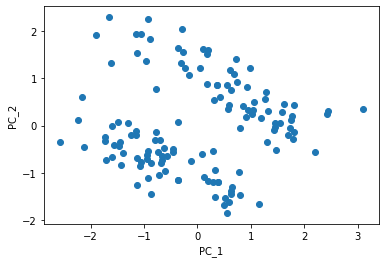

In [48]:
pca = PCA(n_components=2)
PCcomp = pca.fit_transform(normt)
PCdf = pd.DataFrame(data = PCcomp
             , columns = ['PC_1','PC_2'])
covariancematrix = np.cov(PCdf.T)
print('covariance  matrix of PC_1 and PC_2:')
print(covariancematrix)



correlationmatrix = np.corrcoef(PCdf.T)
print('correlation  matrix of PC_1 and PC_2:')
print(correlationmatrix)


x = PCdf['PC_1']
y = PCdf['PC_2']
plt.scatter(x,y)
plt.xlabel('PC_1')
plt.ylabel('PC_2')

covariance  matrix of PC_1,PC_2 and PC_3:
[[ 1.36068531e+00 -7.68389843e-17 -3.16416325e-16]
 [-7.68389843e-17  9.53336268e-01  3.53796399e-17]
 [-3.16416325e-16  3.53796399e-17  7.09234233e-01]]
correlation  matrix of PC_1,PC_2 and PC_3:
[[ 1.00000000e+00 -6.74651840e-17 -3.22095894e-16]
 [-6.74651840e-17  1.00000000e+00  4.30264491e-17]
 [-3.22095894e-16  4.30264491e-17  1.00000000e+00]]


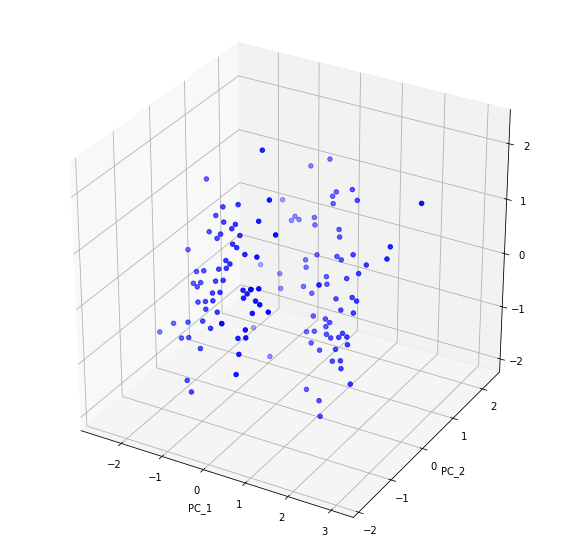

In [52]:
from mpl_toolkits import mplot3d
pca = PCA(n_components=3)
PCcomp = pca.fit_transform(normt)
PCdf = pd.DataFrame(data = PCcomp
             , columns = ['PC_1','PC_2','PC_3'])
covariancematrix = np.cov(PCdf.T)
print('covariance  matrix of PC_1,PC_2 and PC_3:')
print(covariancematrix)

correlationmatrix = np.corrcoef(PCdf.T)
print('correlation  matrix of PC_1,PC_2 and PC_3:')
print(correlationmatrix)


x = PCdf['PC_1']
y = PCdf['PC_2']
z = PCdf['PC_3']
fig = plt.figure(figsize = (10, 10)) 
ax = plt.axes(projection ="3d") 
  
# Creating plot 
ax.scatter3D(x, y, z, color = "blue"); 
plt.xlabel('PC_1')
plt.ylabel('PC_2')


plt.show()